In [1]:
## mount drive as the data is stored in it.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [111]:
from fastai.vision.all import *
set_seed(42)
import os
import pathlib, shutil
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import skimage
import cv2
from skimage import io
from skimage.exposure import histogram
from numpy import expand_dims
from tensorflow.keras.utils import img_to_array,load_img
from keras.preprocessing.image import ImageDataGenerator

In [119]:
train_image_path = '/content/drive/My Drive/pharmaceutical_drug/train'
test_image_path = '/content/drive/My Drive/pharmaceutical_drug/test'

In [112]:
train = pd.read_csv('/content/drive/My Drive/pharmaceutical_drug/Training_set.csv')
test = pd.read_csv('/content/drive/My Drive/pharmaceutical_drug/Testing_set.csv')

train.head()

filename     label
0  Image_1.jpg    Bioflu
1  Image_2.jpg  Bactidol
2  Image_3.jpg  Fish Oil
3  Image_4.jpg  Fish Oil
4  Image_5.jpg    Bioflu

In [113]:
print(f'The train set has {train.shape[0]} images \n while the test set has {test.shape[0]} images')

The train set has 7000 images 
 while the test set has 3000 images


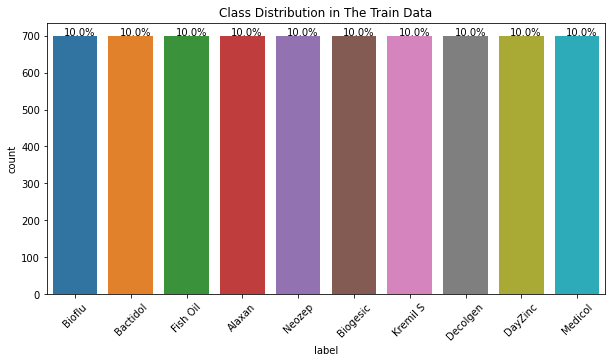

In [ ]:
## check the class distribution in the train dataset

plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'label', data = train)
size = len(train)
for p in ax.patches:
  height, width = p.get_height(), p.get_width()
  x, y = p.get_x(), p.get_y()
  percent = round(height/size * 100, 2)
  label = f'{percent}%'
  ax.annotate(label,(x + width/2- width/4, height))

plt.xticks(rotation=45)
plt.title('Class Distribution in The Train Data')
plt.show()

In [ ]:
path = '/content/drive/My Drive/pharmaceutical_drug/train'
def plot_images(df):
  images = list(df['filename'][:25])
  files = [os.path.join(path, img) for img in images]
  imgs = [Image.open(file) for file in files]

  w, h = imgs[0].size
  grid = Image.new('RGB', size=(5*w, 5*h))
  grid_w, grid_h = grid.size
  
  for i, img in enumerate(imgs):
      grid.paste(img, box=(i%5*w, i//5*h))
  return grid

def img_size(df):
  images = list(df['filename'][:5])
  files = [os.path.join(path, img) for img in images]
  imgs = [Image.open(file) for file in files]
  for i, img in enumerate(imgs):
     print(img.size)

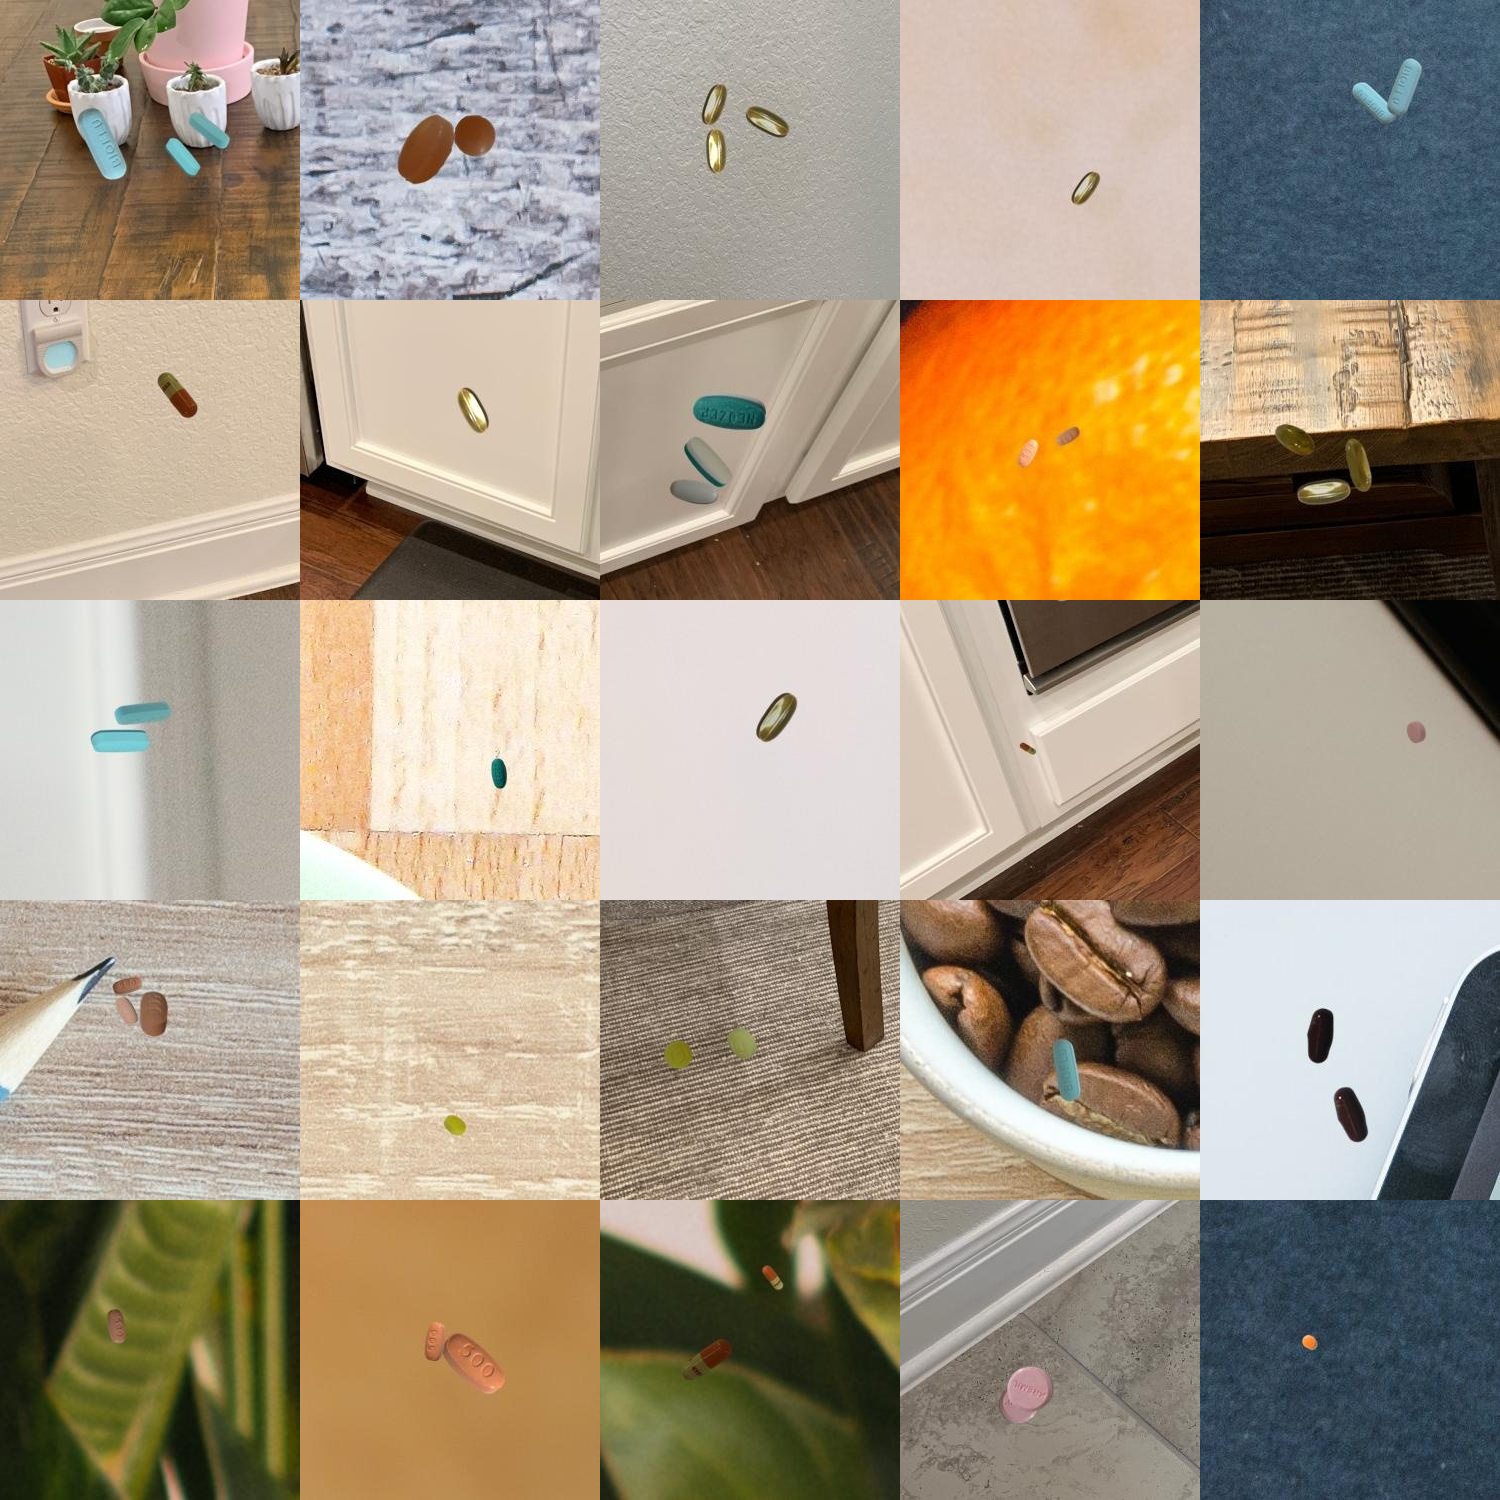

In [ ]:
plot_images(train)

## Edge Detection

### Sobel

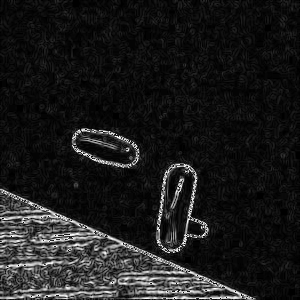

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def sobel_CV2(image):

  sobelx64f = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
  abs_sobel_x64f = np.absolute(sobelx64f)
  sobel_x_8u = np.uint8(abs_sobel_x64f)
  
  sobely64f = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
  abs_sobel_y64f = np.absolute(sobely64f)
  sobel_y_8u = np.uint8(abs_sobel_y64f)
  
  magnitude = np.hypot(sobel_x_8u, sobel_y_8u)
  theta = np.arctan2(sobel_y_8u , sobel_x_8u) 
  

  return magnitude , theta  

if __name__ == "__main__": 

  im_location = '/content/drive/My Drive/pharmaceutical_drug/train/Image_1096.jpg'
  img = cv2.imread(im_location) 
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  M, theta = sobel_CV2(gray_image)
  cv2_imshow(np.uint8(M)) 
  cv2.waitKey(0)

### Canny

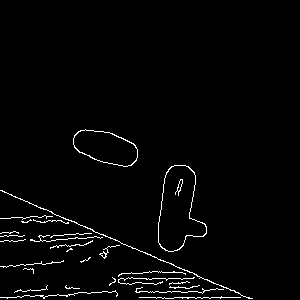

In [ ]:
def canny_CV2(image,low_threshold, high_Threshold):
    edges = cv2.Canny(image,low_threshold, high_Threshold)
    return edges 
  
if __name__ == "__main__": 
  im_location = '/content/drive/My Drive/pharmaceutical_drug/train/Image_1096.jpg'
  image = cv2.imread(im_location) 
  gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blurred_image = cv2.GaussianBlur(gray_image,(3,3),cv2.BORDER_DEFAULT)
  edges = canny_CV2(blurred_image.astype(np.uint8), 100, 200)
  cv2_imshow(np.uint8(edges))
  cv2.waitKey(0)

## Masking

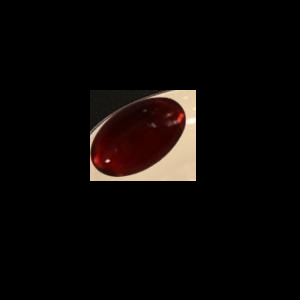

-1

In [47]:
im_location = '/content/drive/My Drive/pharmaceutical_drug/train/Image_1097.jpg'
image = cv2.imread(im_location)
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (90, 90), (195, 180), 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(masked)
cv2.waitKey(0)

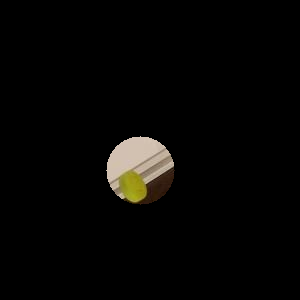

-1

In [43]:
im_location = '/content/drive/My Drive/pharmaceutical_drug/train/Image_1098.jpg'
image = cv2.imread(im_location)
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (140, 170), 34, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(masked)
cv2.waitKey(0)

## Sample Image

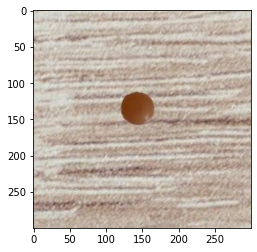

In [ ]:
image = io.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1001.jpg')
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

## Three channels (RGB)

Text(0.5, 0.98, 'Original & RGB image channels')

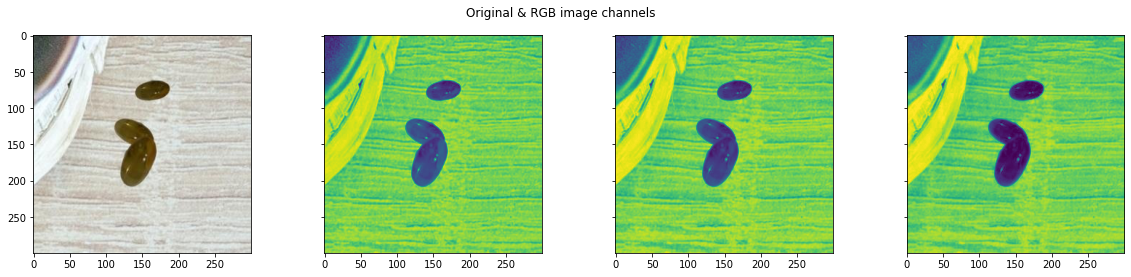

In [58]:
image_rgb = io.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1004.jpg')
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image_rgb)  #Original image
im2.imshow(image_rgb[:, : , 0]) #Red
im3.imshow(image_rgb[:, : , 1]) #Green
im4.imshow(image_rgb[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

## Grayscale image

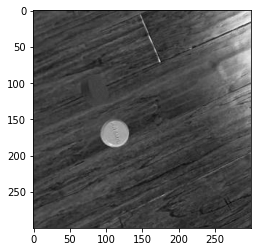

In [62]:
image_gray = io.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1010.jpg')
gray_image = skimage.color.rgb2gray(image_gray)
plt.imshow(gray_image, cmap = 'gray')

## Histogram of gray values

Text(0.5, 1.0, 'histogram of gray values')

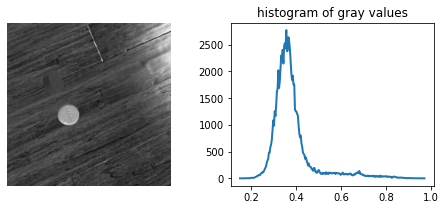

In [63]:
hist, hist_centers = histogram(gray_image)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(gray_image, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

## Normalized image

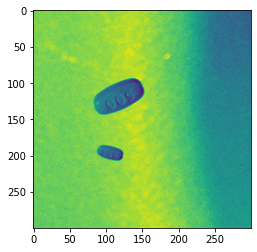

In [64]:
image_normal = io.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1013.jpg')
gray_image = skimage.color.rgb2gray(image_normal)
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

## Image shifting in three positions

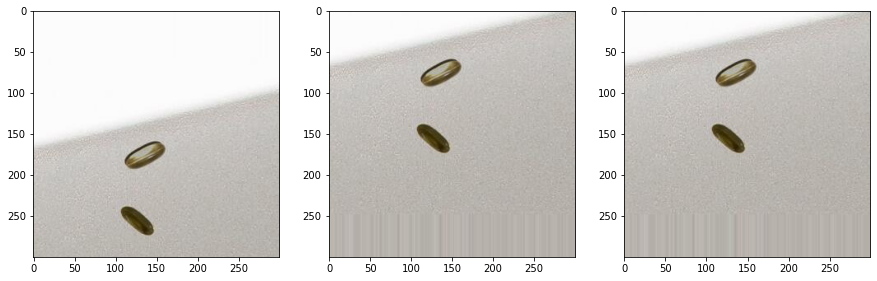

In [65]:
image_shifting = io.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1014.jpg')
data = img_to_array(image_shifting)
samples = expand_dims(image_shifting, 0)
datagen = ImageDataGenerator(width_shift_range=[-50,100])
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    image = next(it)[0].astype('uint8')
    im[i].imshow(image) 

## Image Flipping

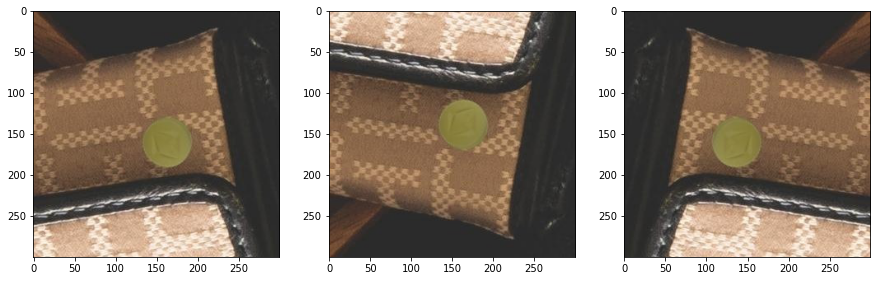

In [66]:
image_flipping = io.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1015.jpg')
data = img_to_array(image_flipping)
samples = expand_dims(image_flipping, 0)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    image = next(it)[0].astype('uint8')
    im[i].imshow(image)

## Image Rotation

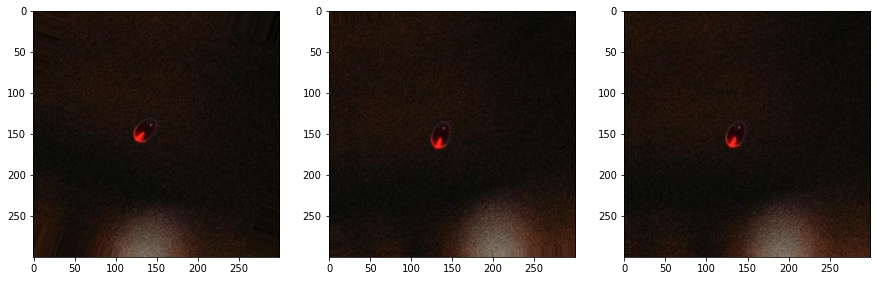

In [70]:
image_rotation = io.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1019.jpg')
data = img_to_array(image_rotation)
samples = expand_dims(image_rotation, 0)
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    image = next(it)[0].astype('uint8')
    im[i].imshow(image)

## Changing Image brightness level

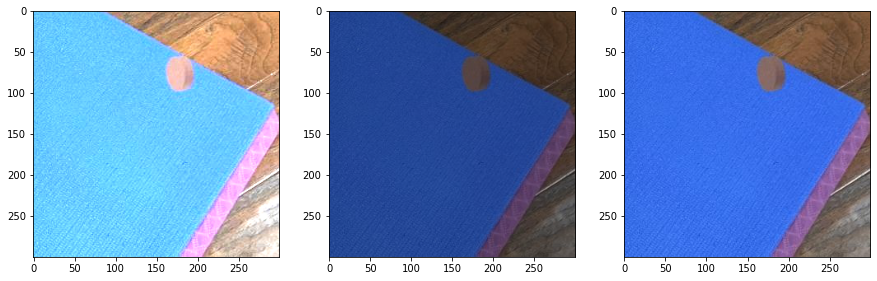

In [71]:
image_brightness = io.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1020.jpg')
data = img_to_array(image_brightness)
samples = expand_dims(image_brightness, 0)
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    image = next(it)[0].astype('uint8')
    im[i].imshow(image)

## Image Standardization 

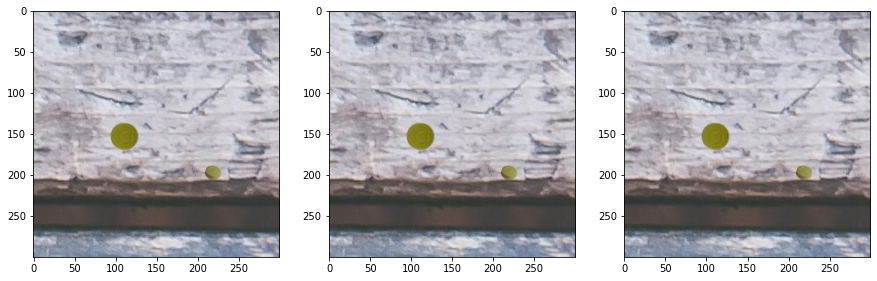

In [73]:
image_standardization = io.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1022.jpg')
data = img_to_array(image_standardization)
samples = expand_dims(image_standardization, 0)
datagen = ImageDataGenerator(featurewise_center =True,featurewise_std_normalization = True)
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
for i in range(3):
    image = next(it)[0].astype('uint8')
    im[i].imshow(image)

## Image Erosion and Dilation

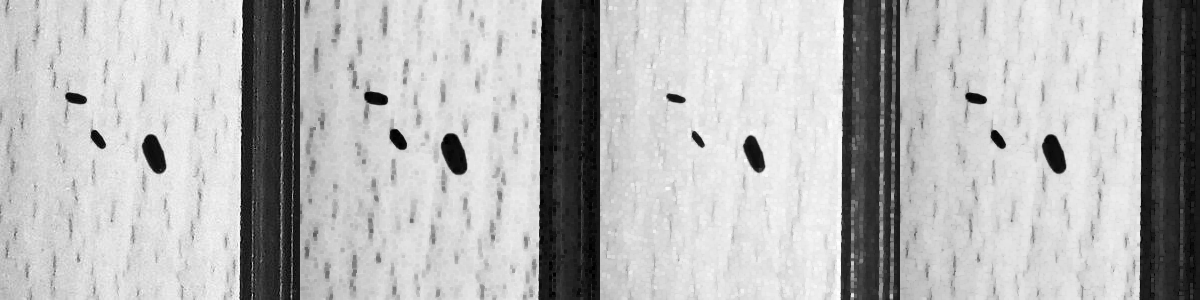

In [83]:
img = cv2.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1008.jpg', 0)
kernel = np.ones((3, 3), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
img_eroded_dilated=cv2.dilate(img_erosion,kernel,iterations=1)
horizontal_concat = np.concatenate((img, img_erosion,img_dilation,img_eroded_dilated), axis=1)
cv2_imshow(horizontal_concat)

In [92]:
def noisy(noise_typ,image):
       if noise_typ == "gauss":
          row,col,ch= image.shape
          mean = 0
          var = 0.1
          sigma = var**0.5
          gauss = np.random.normal(mean,sigma,(row,col,ch))
          gauss = gauss.reshape(row,col,ch)
          noisy = image + gauss
          return noisy
       elif noise_typ == "s&p":
            row,col,ch = image.shape
            s_vs_p = 0.5
            amount = 0.004
            out = np.copy(image)
            # Salt mode
            num_salt = np.ceil(amount * image.size * s_vs_p)
            coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
            out[coords] = 1

            # Pepper mode
            num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
            coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
            out[coords] = 0
            return out
       elif noise_typ == "poisson":
            vals = len(np.unique(image))
            vals = 2 ** np.ceil(np.log2(vals))
            noisy = np.random.poisson(image * vals) / float(vals)
            return noisy
       elif noise_typ =="speckle":
               row,col,ch = image.shape
               gauss = np.random.randn(row,col,ch)
               gauss = gauss.reshape(row,col,ch)        
               noisy = image + image * gauss
               return noisy

<ipython-input-92-55fdc93f5bcd>:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-92-55fdc93f5bcd>:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


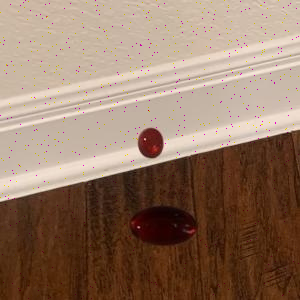

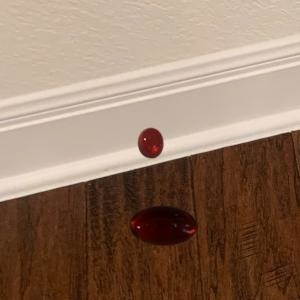

True

In [109]:
image = cv2.imread('/content/drive/My Drive/pharmaceutical_drug/train/Image_1012.jpg') 
noise_img = noisy('s&p',image)
another_noise_img=noisy('gauss',image)
cv2_imshow(noise_img)
cv2_imshow(another_noise_img)
cv2.imwrite('sp_noise.jpg', noise_img)
cv2.imwrite('gauss_noise.jpg',another_noise_img)

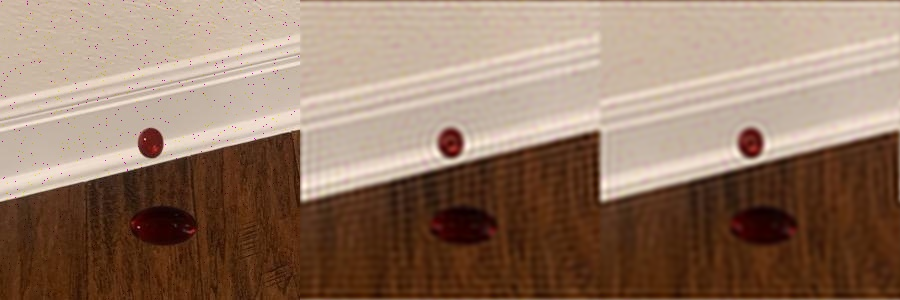

In [107]:
img = cv2.imread('sp_noise.jpg')
dft = np.fft.fft2(img, axes=(0,1))
dft_shift = np.fft.fftshift(dft)
# generate spectrum from magnitude image (for viewing only)
mag = np.abs(dft_shift)
spec = np.log(mag) / 20

# create white circle mask on black background and invert so black circle on white background
# as highpass filter
radius = 32
mask = np.zeros_like(img, dtype=np.float32)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]

# blur the mask
mask2 = cv2.GaussianBlur(mask, (19,19), 0)

# apply mask to dft_shift
dft_shift_masked = np.multiply(dft_shift,mask)/255
dft_shift_masked2 = np.multiply(dft_shift,mask2)/255
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)

# do idft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)
img_filtered2 = np.abs(img_filtered2).clip(0,255).astype(np.uint8)
horizontal_concat = np.concatenate((img,img_filtered,img_filtered2), axis=1)
cv2_imshow(horizontal_concat)
cv2.waitKey(0)
cv2.destroyAllWindows()

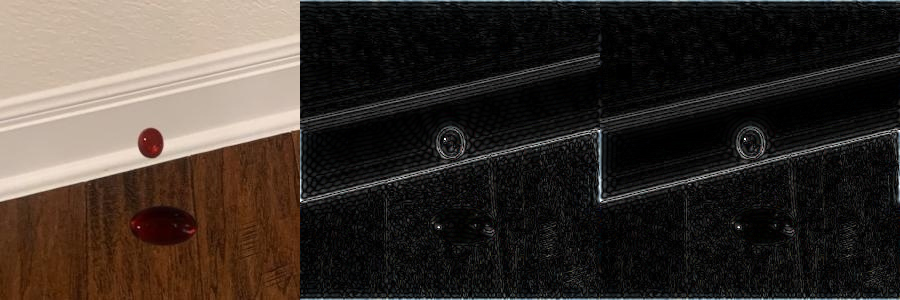

In [110]:
img = cv2.imread('gauss_noise.jpg')
dft = np.fft.fft2(img, axes=(0,1))
dft_shift = np.fft.fftshift(dft)
# generate spectrum from magnitude image (for viewing only)
mag = np.abs(dft_shift)
spec = np.log(mag) / 20

# create white circle mask on black background and invert so black circle on white background
# as highpass filter
radius = 32
mask = np.zeros_like(img, dtype=np.float32)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]
mask=255-mask

# blur the mask
mask2 = cv2.GaussianBlur(mask, (19,19), 0)

# apply mask to dft_shift
dft_shift_masked = np.multiply(dft_shift,mask)/255
dft_shift_masked2 = np.multiply(dft_shift,mask2)/255
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)

# do idft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered = np.abs(3*img_filtered).clip(0,255).astype(np.uint8)
img_filtered2 = np.abs(3*img_filtered2).clip(0,255).astype(np.uint8)
horizontal_concat = np.concatenate((img,img_filtered,img_filtered2), axis=1)
cv2_imshow(horizontal_concat)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Data Preparetion And Modelling

create a data loaders for the image files, labels are gotten from the csv file

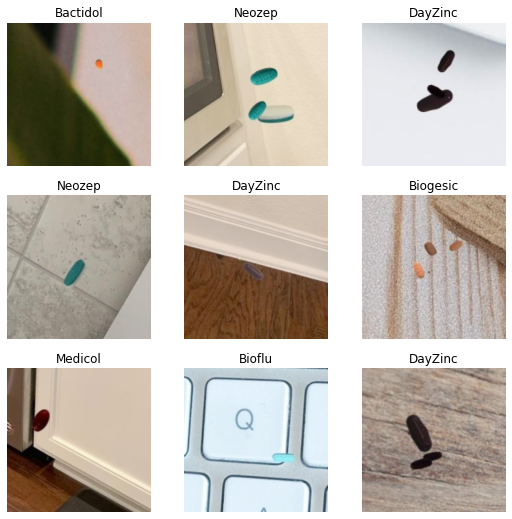

In [114]:
dls = ImageDataLoaders.from_df(train, fn_col='filename', label_col='label', folder='/content/drive/My Drive/pharmaceutical_drug/train/',batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls.show_batch()

### Build A Base Model

From the eda part, we can see that the training set is small and the best approach to this task will be transfer learning. Lets start with resnet18. 

In [130]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import L1, L2, L1L2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
from tqdm import tqdm
import tensorflow_addons as tfa

## Keras Imagedata generator class

In [121]:
train_datagen = ImageDataGenerator(rescale=1 / 255.0,horizontal_flip=True,validation_split=0.15)
test_datagen = ImageDataGenerator(rescale=1 / 255.0,horizontal_flip=True,)

In [123]:
batch_size = 32
target_size = 300
train_generator = train_datagen.flow_from_dataframe(dataframe=train,directory=train_image_path,x_col="filename",y_col="label",
                                                    target_size=(target_size, target_size),batch_size=batch_size,class_mode="categorical",
                                                    subset='training',shuffle=True,seed=42)

valid_generator = train_datagen.flow_from_dataframe(dataframe=train,directory=train_image_path,x_col="filename",y_col="label",
                                                    target_size=(target_size, target_size),batch_size=batch_size,class_mode="categorical",
                                                    subset='validation',shuffle=True,seed=42)
test_generator = test_datagen.flow_from_dataframe(dataframe=test,directory=test_image_path,x_col="filename",
                                                  target_size=(target_size, target_size),batch_size=1,class_mode=None,shuffle=False,)

Found 5950 validated image filenames belonging to 10 classes.
Found 1050 validated image filenames belonging to 10 classes.
Found 3000 validated image filenames.


In [124]:
print(train_generator.class_indices)
class_names = {idx:name for name, idx in train_generator.class_indices.items()}
print(class_names)

{'Alaxan': 0, 'Bactidol': 1, 'Bioflu': 2, 'Biogesic': 3, 'DayZinc': 4, 'Decolgen': 5, 'Fish Oil': 6, 'Kremil S': 7, 'Medicol': 8, 'Neozep': 9}
{0: 'Alaxan', 1: 'Bactidol', 2: 'Bioflu', 3: 'Biogesic', 4: 'DayZinc', 5: 'Decolgen', 6: 'Fish Oil', 7: 'Kremil S', 8: 'Medicol', 9: 'Neozep'}


In [125]:
start = 0
def plot_loss(history_dict):
      key1 = list(history_dict.keys())[0]
      key2 = list(history_dict.keys())[2]
      loss_values = history_dict[key1][start:]
      val_loss_values=history_dict[key2][start:]
      plt.plot(loss_values,'b-',label=key1)
      plt.plot(val_loss_values,'r--',label=key2)
      plt.title('Training vs Validation Loss')
      plt.legend()
      plt.show()
      print(key1, ': ', history_dict[key1][-1], key2,': ', history_dict[key2][-1])

def plot_metric(history_dict):
      key1 = list(history_dict.keys())[1]
      key2 = list(history_dict.keys())[3]
      metric_values = history_dict[key1][start:]
      val_metric_values=history_dict[key2][start:]
      plt.plot(metric_values,'b-',label=key1)
      plt.plot(val_metric_values,'r--',label=key2)
      plt.title('Training vs Validation Metric')
      plt.legend()
      plt.show()
      print(key1, ': ', history_dict[key1][-1], key2,': ', history_dict[key2][-1])

In [126]:
pretrained_model = keras.applications.Xception(include_top=False,weights="imagenet",input_shape=(target_size,target_size,3),pooling=None,classes=10,classifier_activation="softmax",)

83683744/83683744 [==============================] - 0s 0us/step


Training:   0%|           0/7 ETA: ?s,  ?epochs/s

Epoch 1/7
185/185 [==============================] - 2070s 11s/step - loss: 0.6589 - accuracy: 0.8317 - val_loss: 1.8795 - val_accuracy: 0.7451 - lr: 0.0010
Epoch 2/7
185/185 [==============================] - 236s 1s/step - loss: 0.1447 - accuracy: 0.9667 - val_loss: 0.1463 - val_accuracy: 0.9727 - lr: 0.0010
Epoch 3/7
185/185 [==============================] - 236s 1s/step - loss: 0.0912 - accuracy: 0.9787 - val_loss: 0.2534 - val_accuracy: 0.9365 - lr: 0.0010
Epoch 4/7
185/185 [==============================] - 237s 1s/step - loss: 0.0316 - accuracy: 0.9931 - val_loss: 0.0162 - val_accuracy: 0.9951 - lr: 1.0000e-04
Epoch 5/7
185/185 [==============================] - 235s 1s/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.0109 - val_accuracy: 0.9961 - lr: 1.0000e-04
Epoch 6/7
185/185 [==============================] - 235s 1s/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0077 - val_accuracy: 0.9980 - lr: 1.0000e-04
Epoch 7/7
185/185 [==============================] - 235

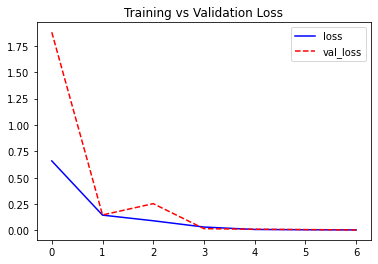

loss :  0.004414945375174284 val_loss :  0.004356611054390669


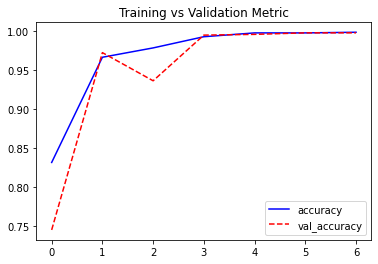

accuracy :  0.9988171458244324 val_accuracy :  0.998046875


In [131]:
model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
metrics=['accuracy'])
tqdm_call = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)
lr_call = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=1, verbose=0, mode="min", cooldown=0, min_lr=0)
stop_call = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(train_generator,
validation_data = valid_generator,
steps_per_epoch = train_generator.n//train_generator.batch_size,
validation_steps = valid_generator.n//valid_generator.batch_size,
epochs=7, callbacks=[tqdm_call, lr_call, stop_call])
plot_loss(history.history)
plt.show()
plot_metric(history.history)
plt.show()

In [133]:
tta_steps = 10
predictions = []
for i in tqdm(range(tta_steps)):
           preds = model.predict(test_generator, steps = len(test_generator.filenames))
           predictions.append(preds)
           preds = np.mean(predictions, axis=0)
           preds = np.argmax(preds, axis=-1)
           test['label_num']=preds
           display(test.head(2))
           test['label'] = test.label_num.map(class_names)
           display(test.head(2))
           test[['filename','label']].to_csv('submission.csv', index=False)
           !head submission.csv

  0%|          | 0/10 [00:00<?, ?it/s]

3000/3000 [==============================] - 899s 300ms/step


filename  label_num
0  Image_1.jpg          5
1  Image_2.jpg          4

filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename,label
Image_1.jpg,Decolgen
Image_2.jpg,DayZinc
Image_3.jpg,Neozep
Image_4.jpg,Fish Oil
Image_5.jpg,Medicol
Image_6.jpg,Bioflu
Image_7.jpg,Bioflu
Image_8.jpg,Neozep
Image_9.jpg,Decolgen


 10%|█         | 1/10 [15:00<2:15:04, 900.54s/it]

3000/3000 [==============================] - 33s 11ms/step


filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename,label
Image_1.jpg,Decolgen
Image_2.jpg,DayZinc
Image_3.jpg,Neozep
Image_4.jpg,Fish Oil
Image_5.jpg,Medicol
Image_6.jpg,Bioflu
Image_7.jpg,Bioflu
Image_8.jpg,Neozep
Image_9.jpg,Decolgen


 20%|██        | 2/10 [15:34<52:07, 390.94s/it]  

3000/3000 [==============================] - 35s 12ms/step


filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename,label
Image_1.jpg,Decolgen
Image_2.jpg,DayZinc
Image_3.jpg,Neozep
Image_4.jpg,Fish Oil
Image_5.jpg,Medicol
Image_6.jpg,Bioflu
Image_7.jpg,Bioflu
Image_8.jpg,Neozep
Image_9.jpg,Decolgen


 30%|███       | 3/10 [16:10<26:41, 228.81s/it]

3000/3000 [==============================] - 34s 11ms/step


filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename,label
Image_1.jpg,Decolgen
Image_2.jpg,DayZinc
Image_3.jpg,Neozep
Image_4.jpg,Fish Oil
Image_5.jpg,Medicol
Image_6.jpg,Bioflu
Image_7.jpg,Bioflu
Image_8.jpg,Neozep
Image_9.jpg,Decolgen


 40%|████      | 4/10 [16:45<15:12, 152.10s/it]

3000/3000 [==============================] - 34s 11ms/step


filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename,label
Image_1.jpg,Decolgen
Image_2.jpg,DayZinc
Image_3.jpg,Neozep
Image_4.jpg,Fish Oil
Image_5.jpg,Medicol
Image_6.jpg,Bioflu
Image_7.jpg,Bioflu
Image_8.jpg,Neozep
Image_9.jpg,Decolgen


 50%|█████     | 5/10 [17:20<09:09, 109.83s/it]

3000/3000 [==============================] - 34s 11ms/step


filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename,label
Image_1.jpg,Decolgen
Image_2.jpg,DayZinc
Image_3.jpg,Neozep
Image_4.jpg,Fish Oil
Image_5.jpg,Medicol
Image_6.jpg,Bioflu
Image_7.jpg,Bioflu
Image_8.jpg,Neozep
Image_9.jpg,Decolgen


 60%|██████    | 6/10 [17:54<05:37, 84.27s/it] 

3000/3000 [==============================] - 34s 11ms/step


filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename,label
Image_1.jpg,Decolgen
Image_2.jpg,DayZinc
Image_3.jpg,Neozep
Image_4.jpg,Fish Oil
Image_5.jpg,Medicol
Image_6.jpg,Bioflu
Image_7.jpg,Bioflu
Image_8.jpg,Neozep
Image_9.jpg,Decolgen


 70%|███████   | 7/10 [18:29<03:24, 68.14s/it]

3000/3000 [==============================] - 34s 11ms/step


filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename,label
Image_1.jpg,Decolgen
Image_2.jpg,DayZinc
Image_3.jpg,Neozep
Image_4.jpg,Fish Oil
Image_5.jpg,Medicol
Image_6.jpg,Bioflu
Image_7.jpg,Bioflu
Image_8.jpg,Neozep
Image_9.jpg,Decolgen


 80%|████████  | 8/10 [19:04<01:55, 57.54s/it]

3000/3000 [==============================] - 34s 11ms/step


filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename,label
Image_1.jpg,Decolgen
Image_2.jpg,DayZinc
Image_3.jpg,Neozep
Image_4.jpg,Fish Oil
Image_5.jpg,Medicol
Image_6.jpg,Bioflu
Image_7.jpg,Bioflu
Image_8.jpg,Neozep
Image_9.jpg,Decolgen


 90%|█████████ | 9/10 [19:39<00:50, 50.55s/it]

3000/3000 [==============================] - 35s 12ms/step


filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename  label_num     label
0  Image_1.jpg          5  Decolgen
1  Image_2.jpg          4   DayZinc

filename,label
Image_1.jpg,Decolgen
Image_2.jpg,DayZinc
Image_3.jpg,Neozep
Image_4.jpg,Fish Oil
Image_5.jpg,Medicol
Image_6.jpg,Bioflu
Image_7.jpg,Bioflu
Image_8.jpg,Neozep
Image_9.jpg,Decolgen


100%|██████████| 10/10 [20:15<00:00, 121.59s/it]


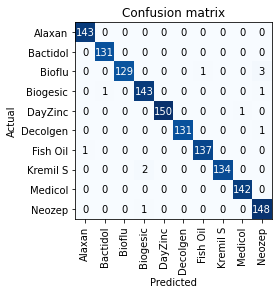

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

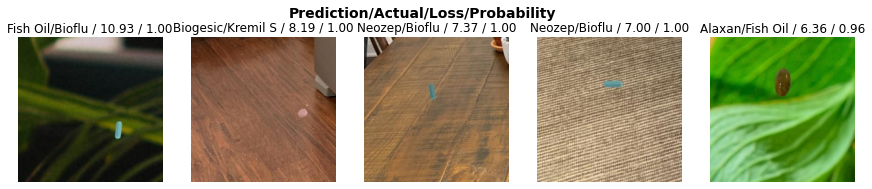

In [ ]:
interp.plot_top_losses(5, nrows = 1)

Looking at the drugs with high losses above, we can see that the pictures are faint compared to the bright pictures from the train batch viewed above. This might be the reason for the bad predictions and can possibily be solved by test time augumentation. Lets verify this below



## Summary

The data was a simple one. There was no need for model ensembling, gradient accumulation, label smoothing, Mixup, or even using dipper architectures. Finding learning rate and training longer (20 epochs) was all I needed.
